# Tarea 1

Nelson Steven Sanabio Maldonado

Curso : CM072

# Librerias necesarias

## Numpy

In [81]:
import numpy as np

# Ejemplo de la velocidad de Numpy con respecto a Python

import time
from __future__ import division 

tam_vec = 1000
def lista_python():
    t1 = time.time()
    X = range(tam_vec)
    Y = range(tam_vec)
    Z = []
    for i in range(len(X)):
        Z.append(X[i] + Y[i])
    return time.time() - t1

def matriz_numpy():
    t1 = time.time()
    X = np.arange(tam_vec)
    Y = np.arange(tam_vec)
    Z = X + Y
    return time.time() - t1

t1 = lista_python()
t2 = matriz_numpy()
print("Tiempo de ejecución de las funciones\n")
print("lista_python = "+str(t1)+"\nmatriz_numpy = "+str(t2))
print("\nNumpy es en este ejemplo " + str(t1/t2) + " mas rapido!")

Tiempo de ejecución de las funciones

lista_python = 0.00044155120849609375
matriz_numpy = 0.0001289844512939453

Numpy es en este ejemplo 3.4232902033271717 mas rapido!


In [110]:
# Dos matrices necesitan realizar broadcasting

A = np.arange(4).reshape((4,1)) # 0 1 2 3
b = np.arange(3) # 0 1 2

A+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

# Pandas

In [120]:
import pandas as pd

# Una serie con listas 
s = pd.Series([3, "Python", 3.56, -123999, "ggplot2"])
s

0          3
1     Python
2       3.56
3    -123999
4    ggplot2
dtype: object

In [125]:
# Agregando indices
s1 = pd.Series([7, 'Java', 3.14, -1789710578, 'Hola a todos!'], index=['A', 'Z', 'C', 'Y', 'E'])
s1


A                7
Z             Java
C             3.14
Y      -1789710578
E    Hola a todos!
dtype: object

In [35]:
import datetime as dt
import numpy as np
from pandas import Series, DataFrame, date_range

# dias y fechas
hoy = dt.datetime.strptime('Jan 21 2015', '%b %d %Y')
print (hoy, '\n')
dias = date_range(hoy, periods=35, freq='D')
st = Series(np.random.normal(10, 1, len(dias)), index=dias)

# Extraemos elementos
print (st[0:4], '\n')
print (st['2015-01-21':'2015-01-28'], '\n') 
df = st.resample(rule ='W', how =('mean', 'std', lambda x: sum(x*x)))
df

2015-01-21 00:00:00 

2015-01-21    11.226815
2015-01-22     8.865444
2015-01-23    10.041555
2015-01-24    11.317115
Freq: D, dtype: float64 

2015-01-21    11.226815
2015-01-22     8.865444
2015-01-23    10.041555
2015-01-24    11.317115
2015-01-25     7.591999
2015-01-26     9.172600
2015-01-27    10.047312
2015-01-28    11.256623
Freq: D, dtype: float64 



/home/nelsuni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


,mean,std,<lambda>
2015-01-25,9.808586,1.592489,491.185852
2015-02-01,10.198192,0.858324,732.442156
2015-02-08,10.029813,0.836490,708.378319
2015-02-15,9.583868,1.278306,652.758036
2015-02-22,9.942714,0.764642,695.510951
2015-03-01,10.444792,0.425591,218.368477


In [37]:
# Data frame
print(type(df))

#Renombrando columnas

df.columns = ('media', 'desviacion', 'suma_cuad')
print(df)

<class 'pandas.core.frame.DataFrame'>
                media  desviacion   suma_cuad
2015-01-25   9.808586    1.592489  491.185852
2015-02-01  10.198192    0.858324  732.442156
2015-02-08  10.029813    0.836490  708.378319
2015-02-15   9.583868    1.278306  652.758036
2015-02-22   9.942714    0.764642  695.510951
2015-03-01  10.444792    0.425591  218.368477


In [40]:
# Divide-aplica-combina
import pandas as pd
url = 'https://raw.github.com/pydata/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
grupos = tips.groupby(['sex', 'smoker'])
grupos

In [45]:
# Contamos el numero de entradas por grupo

grupos.size()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64

In [50]:
# Agregamos margenes

pd.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [54]:
# Realizamos un estandarizacion de unidades para total_bill y tips

zscore = lambda x: (x - x.mean())/x.std()

std_grupos = grupos['total_bill', 'tip'].transform(zscore)
std_grupos.head(n=14)

,total_bill,tip
0,-0.153049,-1.562813
1,-1.083042,-0.975727
2,0.139661,0.259539
3,0.445623,0.131984
4,0.889982,0.741282
5,0.630118,1.071860
6,-1.262952,-0.747471
7,0.812320,0.004429
8,-0.544457,-0.774325
9,-0.574251,0.078277


In [56]:
# Aplicamos algunas funciones al conjunto de datos

grupos['total_bill', 'tip'].agg(['mean', 'min', 'max'])

total_bill                    tip            
                    mean   min    max      mean   min   max
sex    smoker                                              
Female No      18.105185  7.25  35.83  2.773519  1.00   5.2
       Yes     17.977879  3.07  44.30  2.931515  1.00   6.5
Male   No      19.791237  7.51  48.33  3.113402  1.25   9.0
       Yes     22.284500  7.25  50.81  3.051167  1.00  10.0

# Matplotlib

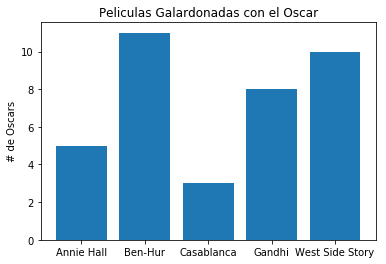

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt

peliculas = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# Centremos las barras
xs = [i + 0.1 for i, _ in enumerate(peliculas)]
plt.bar(xs, num_oscars)

plt.ylabel("# de Oscars")
plt.title("Peliculas Galardonadas con el Oscar")
# Etiquetamos el eje X con el nombre de las peliculas en el centro de las barras
plt.xticks([i + 0.1 for i, _ in enumerate(peliculas)], peliculas)
plt.show()

# Seaborn

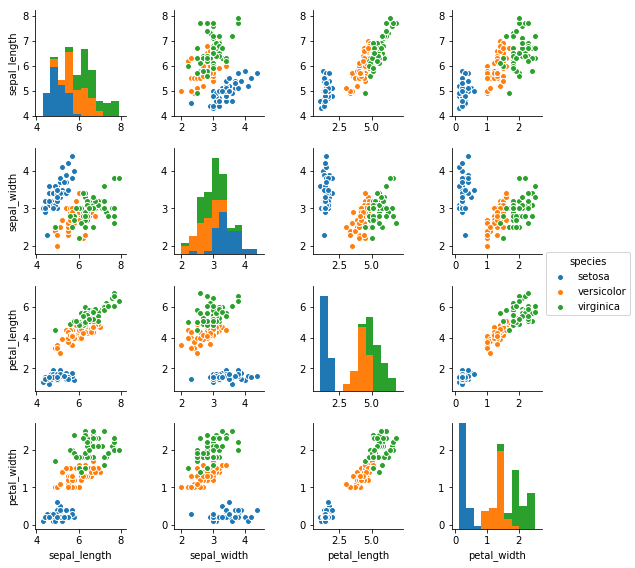

In [70]:
import seaborn as sb

# Ejemplo con Iris datasets
iris = sb.load_dataset("iris")
iris.head()
sb.pairplot(iris, hue="species", size=2.0)

plt.show()

# Código

In [74]:
titanic_data = pd.read_csv('titanic-data.csv')

In [75]:
titanic_data.shape

(891, 12)

In [76]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [78]:
titanic_data["Age"].mean()

29.69911764705882

In [79]:
type(titanic_data["Survived"])

pandas.core.series.Series

In [80]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

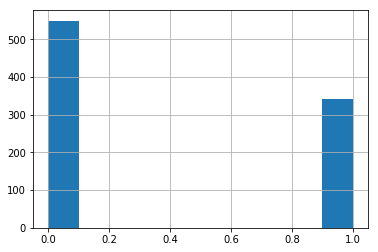

In [84]:
titanic_data["Survived"].hist()

In [85]:
titanic_data.loc[titanic_data["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [88]:
titanic_data.loc[titanic_data["Sex"]=='male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [89]:
len(titanic_data.loc[(titanic_data["Sex"]=='male') & (titanic_data["Survived"]==1)])

109

# Tarea - Solucionado

## ● Cuántas personas de la clase 1 no sobrevivieron?

In [164]:
# Nos piden las personas que no sobrevivieron y que además sean de la clase 1
len(titanic_data.loc[(titanic_data['Pclass']==1) & (titanic_data['Survived']==0)])
#titanic_data.loc[(titanic_data['Pclass']==1) & (titanic_data['Survived']==0)]

80

## ● En qué propiedades encontraste valores perdidos? podrías deshacerte de ellos?


In [185]:
# Analizando la tabla podemos ver que hay datos perdidos en las varibles siguientes:

# Age 
# Cabin
#Embarked

# Con el algoritmo que usaremos mas adelante podemos deshacernos de los datos perdidos.
# Copiando el data frame de titanic_data a titanic

titanic = titanic_data.copy()
# otra manera de copiar dataframe es : titanic = titanic_data

titanic_limpio = titanic.drop(titanic[(titanic['Age'].isnull()) | 
                               (titanic['Cabin'].isnull()) | 
                               (titanic['Embarked'].isnull())].index,axis=0)

#La cantidad de datos validos son 
print ("La cantidad de los datos validos : "+str(len(titanic_limpio)))
titanic_limpio


La cantidad de los datos validos : 183


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


## ● Muestre si al menos un infante de Queenstown sobrevivió? y de los otros puertos de embarcación, existen infantes sobrevivientes?


In [183]:
# Si existe al menos uno que sobrevivió en cada uno de los puertos ('Q','C' y 'S')
# Variables a utilizar son Survived y Embarked

EmbarkedQ=titanic_limpio.loc[(titanic_limpio['Survived']==1) & (titanic_limpio['Embarked']=='Q')]
EmbarkedC=titanic_limpio.loc[(titanic_limpio['Survived']==1) & (titanic_limpio['Embarked']=='C')]
EmbarkedS=titanic_limpio.loc[(titanic_limpio['Survived']==1) & (titanic_limpio['Embarked']=='S')]
print("Puertos:\n"+
      "Queenstown = "+str(len(EmbarkedQ))+
      "\nCherbourg = "+str(len(EmbarkedC))+
      "\nSouthampton = "+str(len(EmbarkedS)))



Puertos:
Queenstown = 1
Cherbourg = 48
Southampton = 74


## ● Cuántas mujeres mayores de 20 años sobrevivieron?


In [184]:
# Para poder hallar, tenemos que solamente mapear las variables Age, Sex y Survived
mujeres = titanic_limpio.loc[(titanic_limpio['Survived']==1) & (titanic_limpio['Age']>20)& (titanic_limpio['Sex']=="female")]
print("Las mujeres que sobrevivieron mayores de 20 años son = "+str(len(mujeres)))

Las mujeres que sobrevivieron mayores de 20 años son = 67
